## Base Libraries and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [11]:
yelp_data_base = pd.read_csv('yelp.csv')
yelp_df = yelp_data_base.copy()

In [12]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [13]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [14]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


## Explore Data

### Correlations of Numerical Columns

<Axes: >

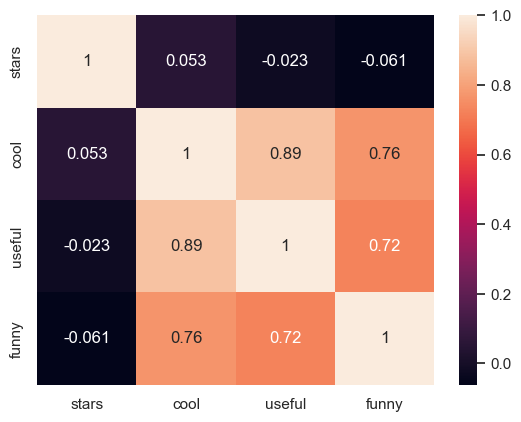

In [24]:
sns.heatmap(yelp_df[['stars', 'cool', 'useful', 'funny']].corr(), annot=True)

In [21]:
yelp_df['length'] = yelp_df['text'].str.len()

In [22]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [28]:
yelp_df[['stars', 'cool', 'useful', 'funny']].corrwith(yelp_df['length'], method='pearson')

stars    -0.114674
cool      0.241451
useful    0.293975
funny     0.251760
dtype: float64

### Plotting Distribution

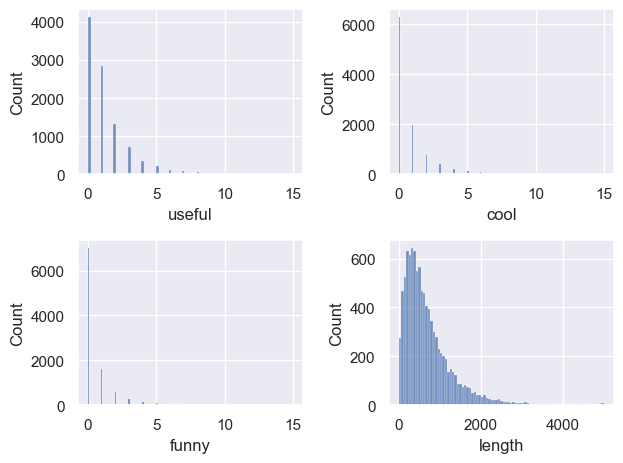

In [70]:
fig, ax = plt.subplots(2,2)
ax = ax.ravel()
plt.sca(ax[0])
sns.histplot(data=yelp_df, x='useful', binrange=(0,15))
plt.sca(ax[1])
sns.histplot(data=yelp_df, x='cool',  binrange=(0,15))
plt.sca(ax[2])
sns.histplot(data=yelp_df, x='funny',  binrange=(0,15))
plt.sca(ax[3])
sns.histplot(data=yelp_df, x='length')
plt.tight_layout()

<Axes: xlabel='count', ylabel='stars'>

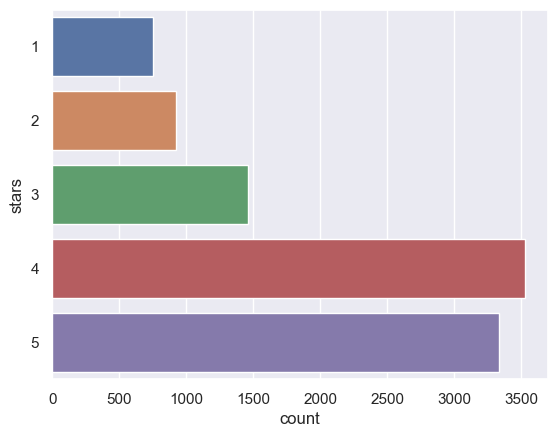

In [71]:
sns.countplot(data=yelp_df, y='stars')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


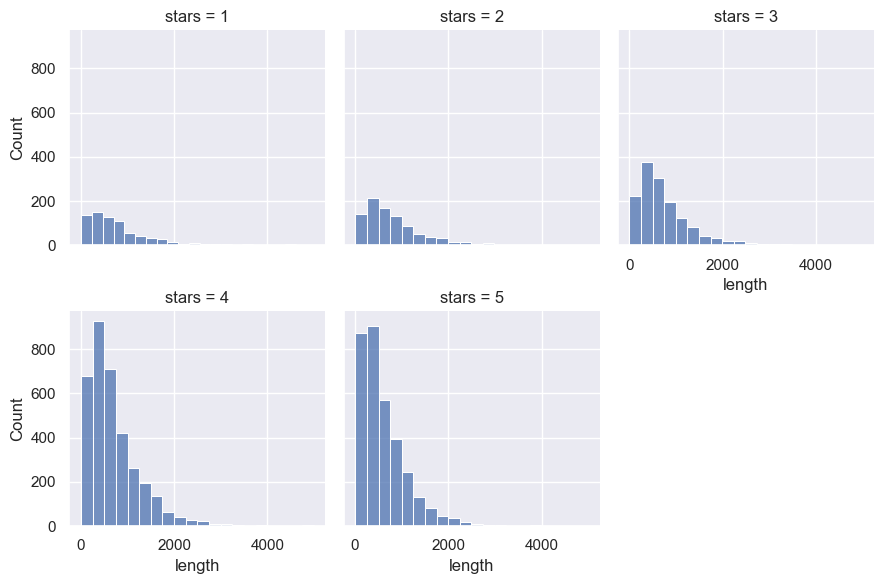

In [75]:
f_grid = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=3)
f_grid.map(sns.histplot, 'length', bins=20)

### Split Data into Good and Bad by Stars

In [76]:
yelp_df_1 = yelp_df[yelp_df['stars'] == 1]

In [77]:
yelp_df_5 = yelp_df[yelp_df['stars'] == 5]

In [79]:
print(yelp_df_1.shape, yelp_df_5.shape)

(749, 11) (3337, 11)


In [87]:
yelp_df_1_5 = pd.concat([yelp_df_1, yelp_df_5], axis=0)

<Axes: xlabel='stars', ylabel='count'>

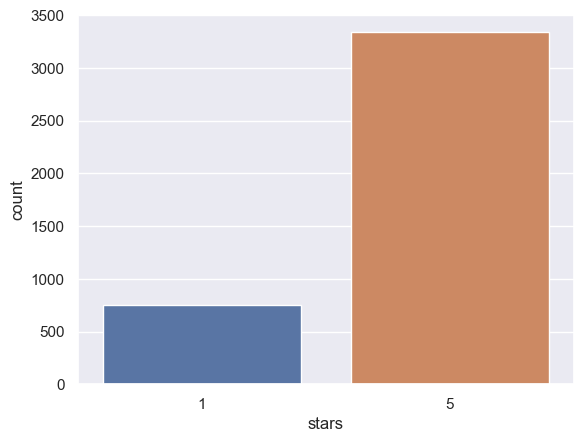

In [88]:
sns.countplot(data=yelp_df_1_5, x='stars')

### Get All Text Data and Remove Punctuation and Stop Words

In [122]:
import nltk
from nltk.corpus import stopwords
import string

def clean_text(text):
    
    text = ''.join([char for char in text if char not in string.punctuation])
    english_stopwords = [word.replace("'","") for word in stopwords.words('english')]
    filtered_words = [word for word in text.split() if word.lower() not in english_stopwords]
    return filtered_words

In [123]:
yelp_df_1['text'].apply(clean_text)

23      [U, go, n, check, car, u, wanna, buy, 1, Thats...
31      [Disgusting, Groupon, daughter, tried, outdate...
35      [Ive, eaten, many, times, none, bad, last, nig...
61      [always, fan, Burlingtons, deals, however, sho...
64      [Another, night, meeting, friends, laugh, Wait...
                              ...                        
9924                                  [Horrible, service]
9931    [love, Saddle, Ranch, casual, night, time, fes...
9953    [HipsterTrendy, think, disappointingweird, cro...
9984    [Went, last, night, Whore, Foods, get, basics,...
9987    [food, delicious, service, discriminatory, bar...
Name: text, Length: 749, dtype: object

In [124]:
yelp_df_1['clean_text'] = yelp_df_1['text'].apply(clean_text)

C:\Users\ritik\AppData\Local\Temp\ipykernel_30196\2311584542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_df_1['clean_text'] = yelp_df_1['text'].apply(clean_text)


In [125]:
yelp_df_5['clean_text'] = yelp_df_5['text'].apply(clean_text)

C:\Users\ritik\AppData\Local\Temp\ipykernel_30196\403229385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_df_5['clean_text'] = yelp_df_5['text'].apply(clean_text)


In [126]:
all_reviews_1 = ' '.join(yelp_df_1['clean_text'].apply(lambda x: ' '.join(x)))

In [127]:
all_reviews_5 = ' '.join(yelp_df_5['clean_text'].apply(lambda x: ' '.join(x)))

### Use Word Cloud to Visualuze Most Common Words

In [111]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

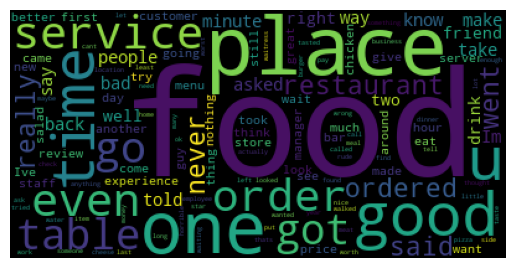

In [128]:
wordcloud_1 = WordCloud().generate(all_reviews_1)
plt.imshow(wordcloud_1)
plt.axis('off')

In [134]:
from collections import Counter
words_1 = Counter(all_reviews_1.split())
words_1.most_common(10)

[('food', 545),
 ('place', 477),
 ('like', 421),
 ('get', 351),
 ('one', 347),
 ('would', 316),
 ('back', 311),
 ('time', 294),
 ('service', 291),
 ('go', 288)]

(-0.5, 399.5, 199.5, -0.5)

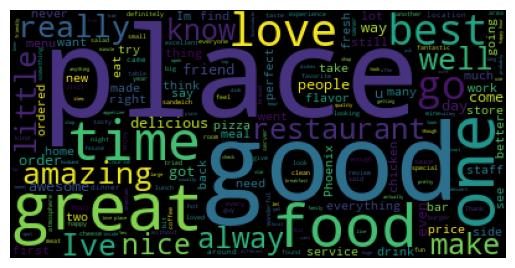

In [133]:
wordcloud_5 = WordCloud().generate(all_reviews_5)
plt.imshow(wordcloud_5)
plt.axis('off')

In [145]:
words_1 = Counter(all_reviews_1)
words_1.most_common(10)

[(' ', 57057),
 ('e', 41157),
 ('a', 23248),
 ('t', 21941),
 ('o', 20903),
 ('s', 20840),
 ('r', 20522),
 ('i', 20403),
 ('n', 19225),
 ('l', 16172)]

### Bigram Analysis

In [146]:
from nltk import FreqDist, bigrams, trigrams

In [157]:
bigrams_1 = list(bigrams(all_reviews_1.split()))
bigrams_1_fd = FreqDist(bigrams_1)
bigrams_1_fd.most_common(20)


[(('customer', 'service'), 58),
 (('go', 'back'), 53),
 (('first', 'time'), 36),
 (('tasted', 'like'), 33),
 (('20', 'minutes'), 29),
 (('going', 'back'), 27),
 (('come', 'back'), 26),
 (('minutes', 'later'), 26),
 (('never', 'go'), 25),
 (('15', 'minutes'), 24),
 (('10', 'minutes'), 24),
 (('even', 'though'), 23),
 (('happy', 'hour'), 22),
 (('30', 'minutes'), 19),
 (('Im', 'sure'), 19),
 (('Ive', 'ever'), 18),
 (('last', 'time'), 18),
 (('one', 'star'), 17),
 (('much', 'better'), 17),
 (('looked', 'like'), 17)]

In [156]:
bigrams_5 = list(bigrams(all_reviews_5.split()))
bigrams_5_fd = FreqDist(bigrams_5)
bigrams_5_fd.most_common(20)


[(('go', 'back'), 128),
 (('ice', 'cream'), 127),
 (('love', 'place'), 121),
 (('happy', 'hour'), 121),
 (('first', 'time'), 118),
 (('highly', 'recommend'), 112),
 (('Ive', 'ever'), 109),
 (('really', 'good'), 99),
 (('great', 'place'), 84),
 (('feel', 'like'), 82),
 (('cant', 'wait'), 81),
 (('great', 'food'), 78),
 (('customer', 'service'), 76),
 (('every', 'time'), 73),
 (('make', 'sure'), 71),
 (('service', 'great'), 69),
 (('great', 'service'), 69),
 (('Ive', 'never'), 68),
 (('one', 'best'), 68),
 (('last', 'night'), 65)]

### Trigram Analysis

In [158]:
trigrams_1 = list(trigrams(all_reviews_1.split()))
trigrams_1_fd = FreqDist(trigrams_1)
trigrams_1_fd.most_common(20)


[(('never', 'go', 'back'), 16),
 (('another', '20', 'minutes'), 6),
 (('go', 'somewhere', 'else'), 6),
 (('happy', 'hour', 'prices'), 5),
 (('food', 'Ive', 'ever'), 5),
 (('20', 'minutes', 'later'), 5),
 (('would', 'never', 'go'), 5),
 (('chicken', 'fried', 'rice'), 5),
 (('never', 'came', 'back'), 4),
 (('Bun', 'Bo', 'Hue'), 4),
 (('Classic', 'Car', 'Spa'), 4),
 (('take', '10', 'minutes'), 4),
 (('going', 'back', 'place'), 4),
 (('sweet', 'potato', 'fries'), 4),
 (('Buca', 'Di', 'Beppo'), 4),
 (('never', 'going', 'back'), 4),
 (('hard', 'earned', 'money'), 4),
 (('could', 'give', 'zero'), 4),
 (('wanted', 'love', 'place'), 3),
 (('4', '5', 'star'), 3)]

In [159]:
trigrams_5 = list(trigrams(all_reviews_5.split()))
trigrams_5_fd = FreqDist(trigrams_5)
trigrams_5_fd.most_common(20)

[(('wait', 'go', 'back'), 42),
 (('cant', 'wait', 'go'), 32),
 (('cant', 'go', 'wrong'), 29),
 (('would', 'highly', 'recommend'), 20),
 (('best', 'Ive', 'ever'), 19),
 (('go', 'back', 'try'), 19),
 (('great', 'service', 'great'), 16),
 (('one', 'favorite', 'places'), 15),
 (('sweet', 'potato', 'fries'), 15),
 (('worth', 'every', 'penny'), 14),
 (('Great', 'food', 'great'), 13),
 (('staff', 'always', 'friendly'), 12),
 (('wait', 'come', 'back'), 12),
 (('cant', 'say', 'enough'), 12),
 (('say', 'enough', 'good'), 12),
 (('food', 'great', 'service'), 12),
 (('never', 'bad', 'experience'), 11),
 (('great', 'customer', 'service'), 11),
 (('service', 'great', 'food'), 11),
 (('great', 'food', 'great'), 11)]

## Preprocessing and Data Prepartation

In [174]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=clean_text)
yelp_1_5_vectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yelp_1_5_vectorizer, yelp_df_1_5['stars'], test_size=0.2, random_state=42)

## Modeling

### Multinomial Naive Bayes

In [201]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()

In [202]:
multi_nb.fit(X_train, y_train)

MultinomialNB()

In [203]:
multi_nb.score(X_train, y_train)

0.980110159118727

In [240]:
from sklearn.model_selection import cross_val_score
nb_scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5, )
print(nb_scores.mean())

0.9091209238939545


In [267]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
def show_results(model, X, y):
    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    sns.heatmap(confusion_matrix(y, predictions), annot=True, fmt='d')
    plt.show()
    print(classification_report(y, predictions))
    return accuracy, precision, recall

Accuracy:  0.980110159118727
Precision:  0.9924385633270322
Recall:  0.8959044368600683


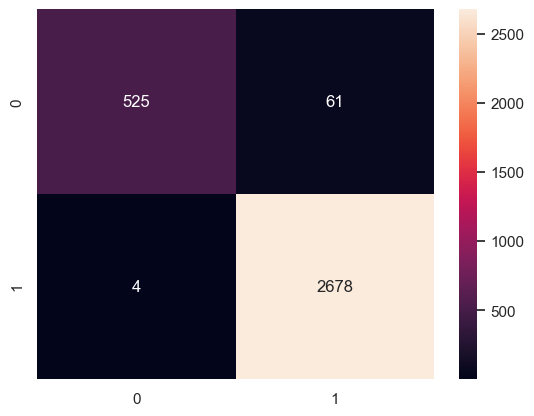

              precision    recall  f1-score   support

           1       0.99      0.90      0.94       586
           5       0.98      1.00      0.99      2682

    accuracy                           0.98      3268
   macro avg       0.99      0.95      0.96      3268
weighted avg       0.98      0.98      0.98      3268



In [268]:
nb_results = show_results(multi_nb, X_train, y_train)

### Logistic Regression

In [208]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [209]:
log_reg.score(X_train, y_train)

0.9978580171358629

In [210]:
lr_scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5, )
print(lr_scores.mean())

0.918911539776426


Accuracy:  0.9978580171358629
Precision:  1.0
Recall:  0.9880546075085325


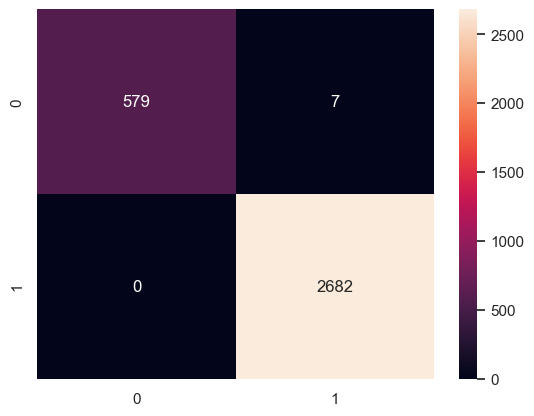

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       586
           5       1.00      1.00      1.00      2682

    accuracy                           1.00      3268
   macro avg       1.00      0.99      1.00      3268
weighted avg       1.00      1.00      1.00      3268



In [274]:
lr_results = show_results(log_reg, X_train, y_train)

### SVM

In [217]:
from sklearn.svm import SVC

In [226]:
lin_svc = SVC(kernel='linear', probability=True)
lin_svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [227]:
lin_svc.score(X_train, y_train)

0.9996940024479805

In [229]:
ls_scores = cross_val_score(SVC(kernel='linear', probability=True), X_train, y_train, cv=5, )
print(ls_scores.mean())

0.907891125878678


Accuracy:  0.9996940024479805
Precision:  1.0
Recall:  0.9982935153583617


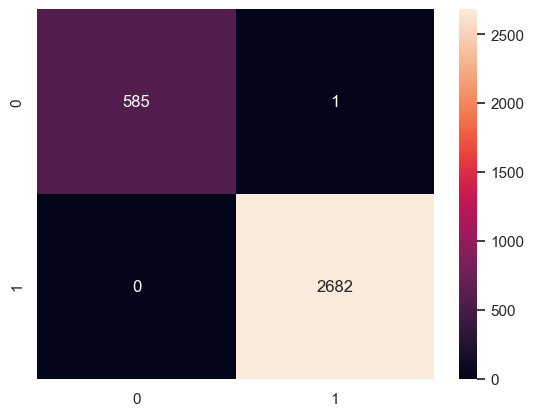

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       586
           5       1.00      1.00      1.00      2682

    accuracy                           1.00      3268
   macro avg       1.00      1.00      1.00      3268
weighted avg       1.00      1.00      1.00      3268



In [273]:
ls_results = show_results(lin_svc, X_train, y_train)

### Voting Ensemble

In [230]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier([('lr', LogisticRegression()), ('nb',MultinomialNB()), ('ls',SVC(kernel='linear', probability=True))], voting='soft')

In [231]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('nb', MultinomialNB()),
                             ('ls', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [232]:
voting_clf.score(X_train, y_train)

0.9972460220318238

In [235]:
v_scores = cross_val_score(voting_clf, X_train, y_train, cv=5)
print(v_scores.mean())

0.9268691665378798


Accuracy:  0.9972460220318238
Precision:  1.0
Recall:  0.984641638225256


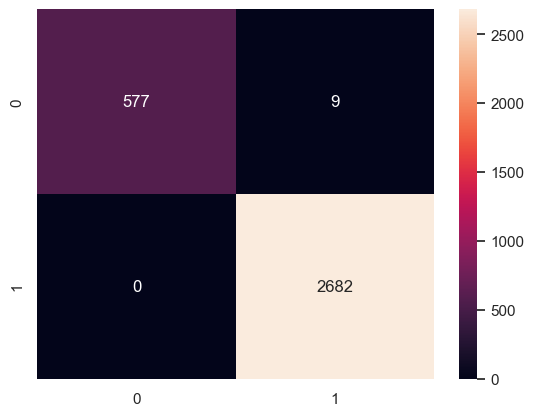

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       586
           5       1.00      1.00      1.00      2682

    accuracy                           1.00      3268
   macro avg       1.00      0.99      1.00      3268
weighted avg       1.00      1.00      1.00      3268



In [272]:
v_results = show_results(voting_clf, X_train, y_train)

### Training Results

In [263]:
models = [multi_nb.__class__.__name__, log_reg.__class__.__name__, lin_svc.__class__.__name__, voting_clf.__class__.__name__]
scores = [nb_scores.mean(), lr_scores.mean(), ls_scores.mean(), v_scores.mean()]
index = ['accuracy', 'precision', 'recall']
results = pd.DataFrame({}, columns = models, index=index)

In [275]:
results['MultinomialNB'] = nb_results
results['LogisticRegression'] = lr_results
results['SVC'] = ls_results
results['VotingClassifier'] = v_results

In [277]:
results.loc['cross_val_score'] = [nb_scores.mean(), lr_scores.mean(), ls_scores.mean(), v_scores.mean()]

In [278]:
results

,MultinomialNB,LogisticRegression,SVC,VotingClassifier
accuracy,0.980110,0.997858,0.999694,0.997246
precision,0.992439,1.000000,1.000000,1.000000
recall,0.895904,0.988055,0.998294,0.984642
cross_val_score,0.909121,0.918912,0.907891,0.926869


## Evaluation

Accuracy:  0.9242053789731052
Precision:  0.9173553719008265
Recall:  0.6809815950920245


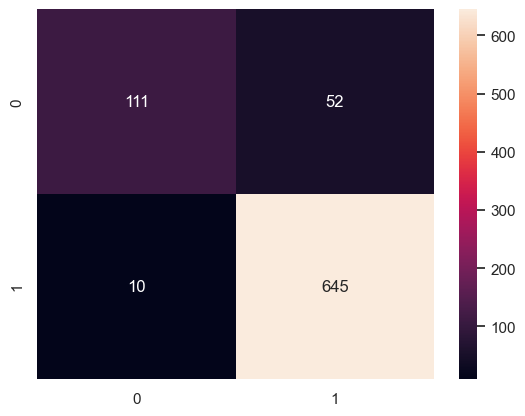

              precision    recall  f1-score   support

           1       0.92      0.68      0.78       163
           5       0.93      0.98      0.95       655

    accuracy                           0.92       818
   macro avg       0.92      0.83      0.87       818
weighted avg       0.92      0.92      0.92       818



In [280]:
best_model_results = show_results(voting_clf, X_test, y_test)